In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel
from seirt_opt import seirt_abm_gill, seirt_abm_sample
from SEIR_x_UD import seirxud_abm_gill, SEIRxUD

In [45]:
N = 1000
I0 = 0.01
c = 4
beta = 0.4
alpha = 0.1
gamma = 0.3
theta = 0.1
kappa = 0.03
eta = 0.3
chi = 0.5

print('R0 = {0}'.format(beta*c/gamma))

R0 = 5.333333333333334


In [46]:
tmax = 100
t = np.linspace(0, tmax, 1000)

params = {
    'c': c,
    'beta': beta,
    'alpha': alpha,
    'gamma': gamma,
    'theta': theta,
    'kappa': kappa,
    'eta': eta,
    'chi': chi
}

paramsNoCT = dict(params)

model = SEIRxUD(N=N, tmax=tmax, I0=I0, params=params)

trajsGill = model.run_abm()

trajsGillAvg = np.average(trajsGill, axis=0)
trajsGillStd = np.std(trajsGill, axis=0)

In [47]:
traj = model.run_cmodel(etadamp=1)
trajNoCT = model.run_cmodel(etadamp=0)

<IPython.core.display.Javascript object>


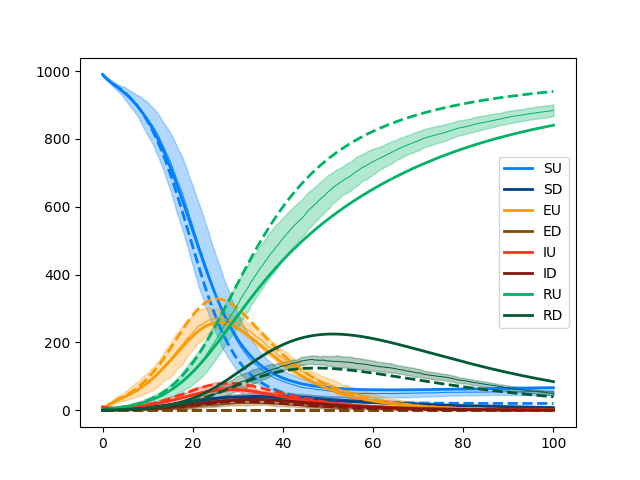

In [48]:
fig, ax = plt.subplots()

colors = {
    'S': np.array((0.0, 0.5, 1.0)),
    'E': np.array((1.0, 0.6, 0.0)),
    'I': np.array((1.0, 0.2, 0.1)),
    'R': np.array((0.0, 0.7, 0.4)),
}

#ax.set_ylim(0,2000)
stdn = 1

for i, s in enumerate('SEIR'):
    for j, d in enumerate('UD'):
        c = colors[s]*(1 if j == 0 else 0.5)
        ax.plot(t, traj['y'][:,2*i+j], c=c, label=s+d, lw=2.0)
        ax.plot(t, trajNoCT['y'][:,2*i+j], c=c, lw=2.0, ls='--')
        ax.plot(t, trajsGillAvg[2*i+j], c=c, lw=0.7)
        ax.fill_between(t, 
                        trajsGillAvg[2*i+j]+stdn*trajsGillStd[2*i+j], 
                        trajsGillAvg[2*i+j]-stdn*trajsGillStd[2*i+j], 
                        color=list(c) + [0.3])
    
ax.legend()

<IPython.core.display.Javascript object>


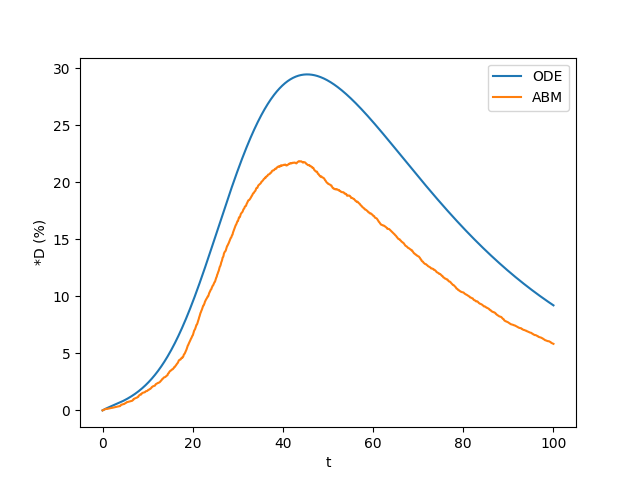

In [49]:
# Total fraction of diagnosed people

fig, ax = plt.subplots()

ax.set_xlabel('t')
ax.set_ylabel('*D (%)')

ax.plot(t, np.sum(traj['y'][:,1::2], axis=1)*100/N, label='ODE')
ax.plot(t, np.sum(trajsGillAvg[1::2], axis=0)*100/N, label='ABM')

ax.legend()